In [42]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

### Exploratory Data Analysis(EDA)

In [43]:
df = pd.read_csv('Data_set/fake_job_postings.csv')

In [44]:
df.head()

,job_id,title,location,department,salary_range,company_profile,description,requirements,benefits,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,industry,function,fraudulent
0,1,Marketing Intern,"US, NY, New York",Marketing,NaN,"We're Food52, and we've created a groundbreaki...","Food52, a fast-growing, James Beard Award-winn...",Experience with content management systems a m...,NaN,0,1,0,Other,Internship,NaN,NaN,Marketing,0
1,2,Customer Service - Cloud Video Production,"NZ, , Auckland",Success,NaN,"90 Seconds, the worlds Cloud Video Production ...",Organised - Focused - Vibrant - Awesome!Do you...,What we expect from you:Your key responsibilit...,What you will get from usThrough being part of...,0,1,0,Full-time,Not Applicable,NaN,Marketing and Advertising,Customer Service,0
2,3,Commissioning Machinery Assistant (CMA),"US, IA, Wever",NaN,NaN,Valor Services provides Workforce Solutions th...,"Our client, located in Houston, is actively se...",Implement pre-commissioning and commissioning ...,NaN,0,1,0,NaN,NaN,NaN,NaN,NaN,0
3,4,Account Executive - Washington DC,"US, DC, Washington",Sales,NaN,Our passion for improving quality of life thro...,THE COMPANY: ESRI – Environmental Systems Rese...,"EDUCATION: Bachelor’s or Master’s in GIS, busi...",Our culture is anything but corporate—we have ...,0,1,0,Full-time,Mid-Senior level,Bachelor's Degree,Computer Software,Sales,0
4,5,Bill Review Manager,"US, FL, Fort Worth",NaN,NaN,SpotSource Solutions LLC is a Global Human Cap...,JOB TITLE: Itemization Review ManagerLOCATION:...,QUALIFICATIONS:RN license in the State of Texa...,Full Benefits Offered,0,1,1,Full-time,Mid-Senior level,Bachelor's Degree,Hospital & Health Care,Health Care Provider,0


In [45]:
df.shape

(17880, 18)

In [46]:
df.columns

Index(['job_id', 'title', 'location', 'department', 'salary_range',
       'company_profile', 'description', 'requirements', 'benefits',
       'telecommuting', 'has_company_logo', 'has_questions', 'employment_type',
       'required_experience', 'required_education', 'industry', 'function',
       'fraudulent'],
      dtype='object')

In [47]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17880 entries, 0 to 17879
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   job_id               17880 non-null  int64 
 1   title                17880 non-null  object
 2   location             17534 non-null  object
 3   department           6333 non-null   object
 4   salary_range         2868 non-null   object
 5   company_profile      14572 non-null  object
 6   description          17879 non-null  object
 7   requirements         15184 non-null  object
 8   benefits             10668 non-null  object
 9   telecommuting        17880 non-null  int64 
 10  has_company_logo     17880 non-null  int64 
 11  has_questions        17880 non-null  int64 
 12  employment_type      14409 non-null  object
 13  required_experience  10830 non-null  object
 14  required_education   9775 non-null   object
 15  industry             12977 non-null  object
 16  func

In [48]:
# check for missing values
df.isnull().sum()

job_id                     0
title                      0
location                 346
department             11547
salary_range           15012
company_profile         3308
description                1
requirements            2696
benefits                7212
telecommuting              0
has_company_logo           0
has_questions              0
employment_type         3471
required_experience     7050
required_education      8105
industry                4903
function                6455
fraudulent                 0
dtype: int64

In [49]:
# percentage of missing values
df.isnull().sum() / len(df) * 100 

job_id                  0.000000
title                   0.000000
location                1.935123
department             64.580537
salary_range           83.959732
company_profile        18.501119
description             0.005593
requirements           15.078300
benefits               40.335570
telecommuting           0.000000
has_company_logo        0.000000
has_questions           0.000000
employment_type        19.412752
required_experience    39.429530
required_education     45.329978
industry               27.421700
function               36.101790
fraudulent              0.000000
dtype: float64

In [50]:
# for text columns, we can replace missing values with missing
text_columns = ['company_profile', 'description', 'requirements', 'benefits']
df[text_columns] = df[text_columns].fillna('missing')

<p> Here we are dealing with prediction of fake job posting so, we will fill missing values with relevant placeholders. Due to the nature of prediction, this seems feasible. </p>

In [51]:
# for categorical columns, we can replace missing values with the relevant placeholders
df['employment_type'] = df['employment_type'].fillna('Not Specified')
df['required_experience'] = df['required_experience'].fillna('Not Specified')
df['required_education'] = df['required_education'].fillna('Not Specified')
df['industry'] = df['industry'].fillna('Not Specified')
df['function'] = df['function'].fillna('Not Specified')
df['location'] = df['location'].fillna('Unknown')
df['department'] = df['department'].fillna('Unknown')


In [52]:
df['salary_range'] = df['salary_range'].fillna('Not Specified')

In [53]:
df.isnull().sum()

job_id                 0
title                  0
location               0
department             0
salary_range           0
company_profile        0
description            0
requirements           0
benefits               0
telecommuting          0
has_company_logo       0
has_questions          0
employment_type        0
required_experience    0
required_education     0
industry               0
function               0
fraudulent             0
dtype: int64

<p>Let's do some visualization. shall we ?</p>

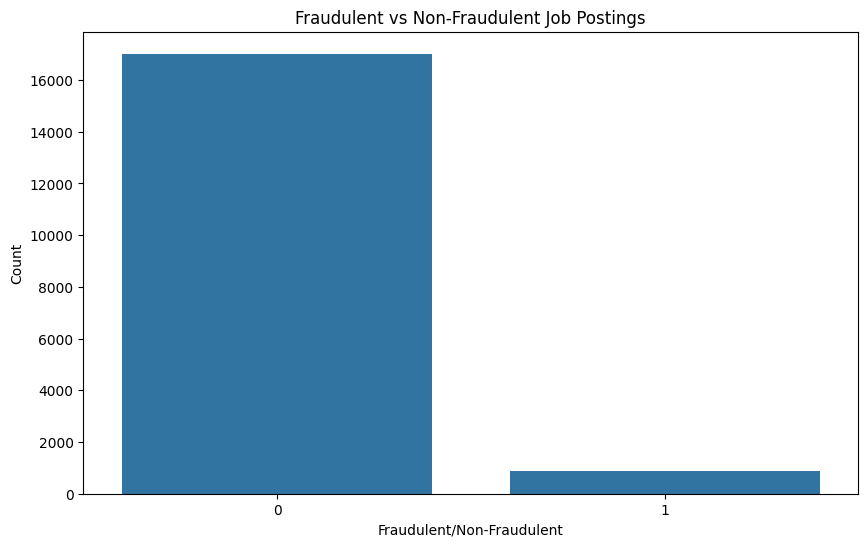

In [54]:
# plot the target variable
plt.figure(figsize=(10, 6))
sns.countplot(x='fraudulent', data=df)
plt.xlabel('Fraudulent/Non-Fraudulent')
plt.ylabel('Count')
plt.title('Fraudulent vs Non-Fraudulent Job Postings')
plt.show()

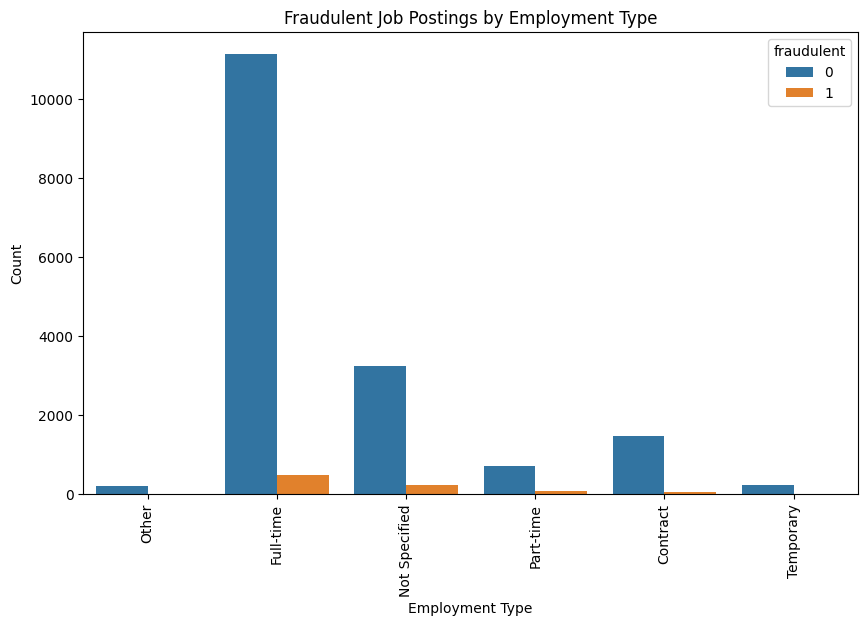

In [55]:
# fraudulent job by employment type
plt.figure(figsize=(10, 6))
sns.countplot(x='employment_type', data=df, hue='fraudulent')
plt.xticks(rotation=90)
plt.xlabel('Employment Type')
plt.ylabel('Count')
plt.title('Fraudulent Job Postings by Employment Type')
plt.show()


<p>Most jobs are fraudulent having full-time as a employment type and are least fraudelent having temporary employment type.</p>

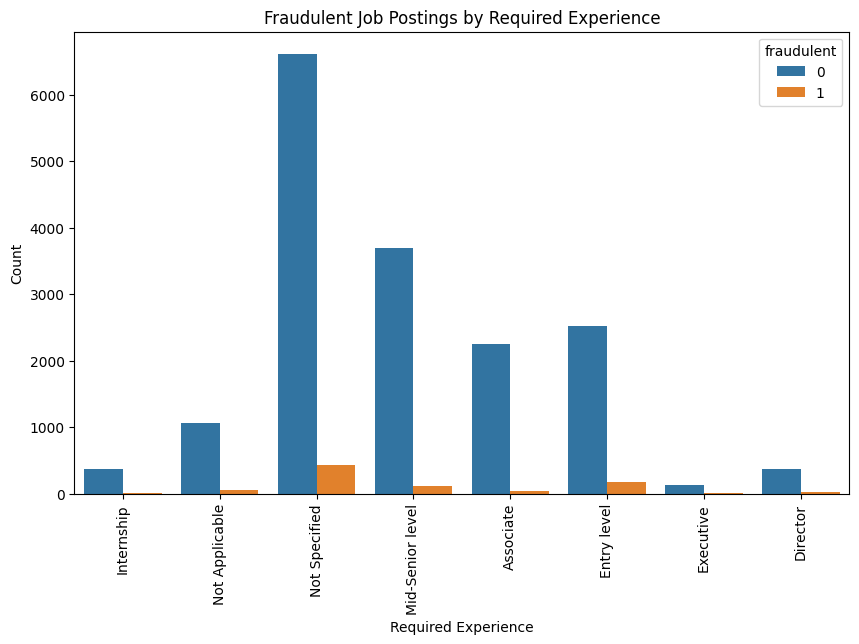

In [56]:
# count plot of fraudulent job postings by required experience
plt.figure(figsize=(10, 6))
sns.countplot(x='required_experience', data=df, hue='fraudulent')
plt.xticks(rotation=90)
plt.xlabel('Required Experience')
plt.ylabel('Count')
plt.title('Fraudulent Job Postings by Required Experience')
plt.show()

<p> From above most entry level jobs are in fradulent category</p>

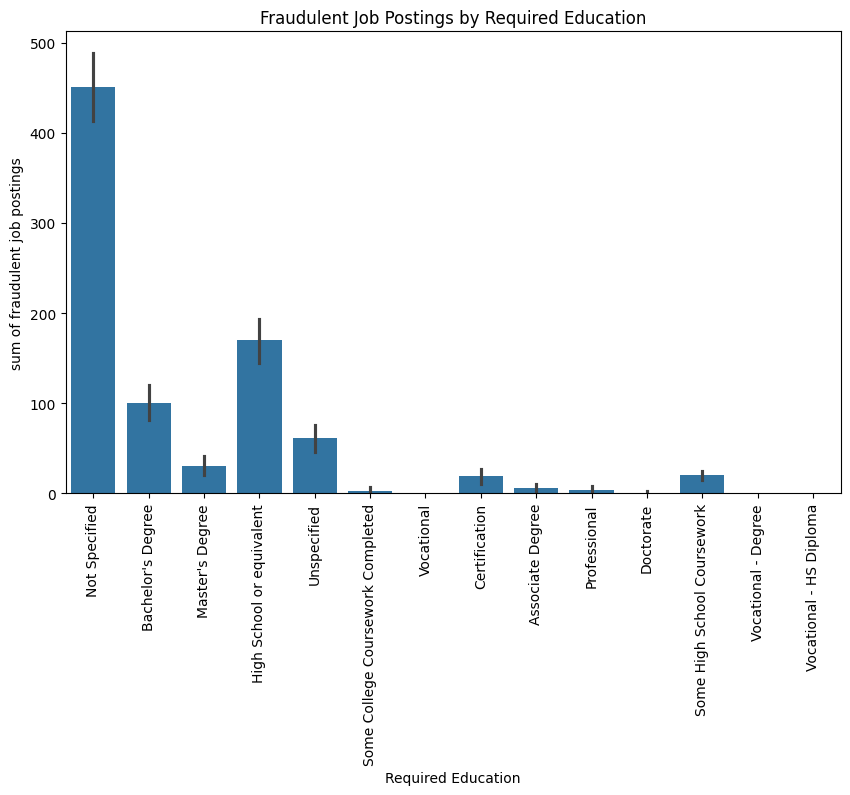

In [57]:
# Bar plot of fraudulent job postings by required education
plt.figure(figsize=(10, 6))
sns.barplot(x='required_education', y='fraudulent', data=df, estimator=sum)
plt.xticks(rotation=90)
plt.xlabel('Required Education')
plt.ylabel('sum of fraudulent job postings')
plt.title('Fraudulent Job Postings by Required Education')
plt.show()

<p> Here we can see most of the fraud job have required education not specified. So this also might be the determining factor that fraud job has no education experience specified. </p>

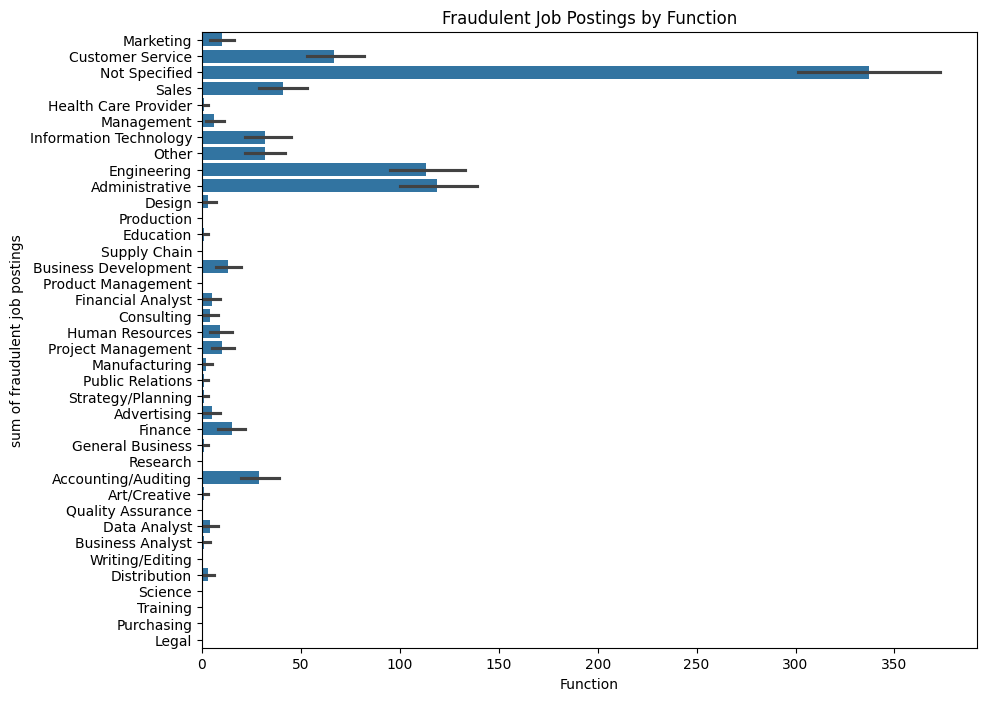

In [58]:
# sum of fraud posting by function
plt.figure(figsize=(10, 8))
sns.barplot(x='fraudulent', y='function', data=df, estimator=sum)
plt.xticks()
plt.xlabel('Function')
plt.ylabel('sum of fraudulent job postings')
plt.title('Fraudulent Job Postings by Function')
plt.show()

<p>This also suggests that the fraud job has no any function specified. Moreover, Administrative jobs are most fraudulent function among the specified.</p>

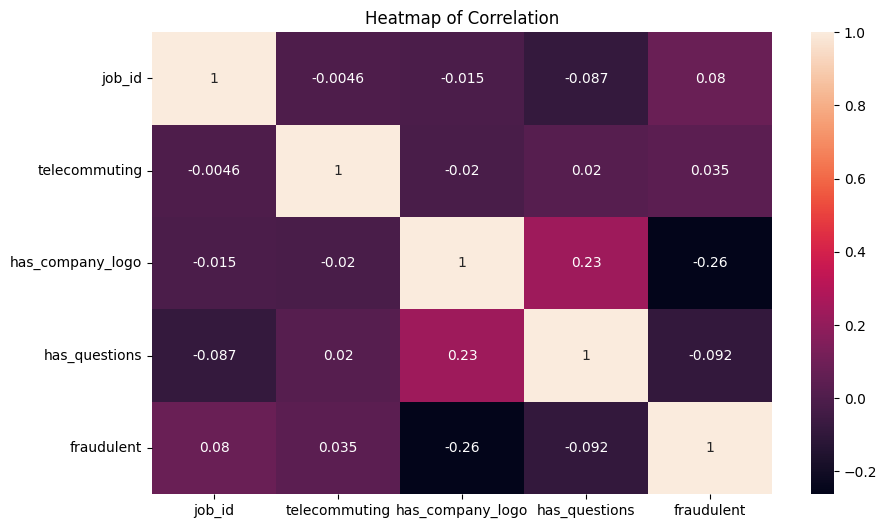

In [59]:
# heatmap of correlation
plt.figure(figsize=(10, 6))
df_corr = df.select_dtypes(include='number')
sns.heatmap(df_corr.corr(), annot=True)
plt.title('Heatmap of Correlation')
plt.show()

<p>Lol, It doesn't give much sense coz we don't have many numerical columns, anyway let's get into text preprocessing, this is where we have the work left coz the data is text based. </p>

In [60]:
# text preprocessing
import re

def preprocess_text(text):
    # remove special characters
    text = re.sub(r'[^a-zA-Z\s]', '', text, re.I|re.A)
    # remove digits
    text = re.sub(r'\d+', '', text)
    # convert text to lowercase
    text = text.lower()
    return text

In [61]:
# applying preprocessing to text columns
text_columns = ['company_profile', 'description', 'requirements', 'benefits']
for col in text_columns:
    df[col] = df[col].apply(preprocess_text)

In [62]:
# combine text features into a single column before vectorization
df['text'] = df['company_profile'] + ' ' + df['description'] + ' ' + df['requirements'] + ' ' + df['benefits']
df['text'] = df['text'].apply(lambda x: x.strip())

In [63]:
# vectorization using TF-IDF
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf_vectorizer = TfidfVectorizer(max_features=5000)

In [64]:
# train test split
from sklearn.model_selection import train_test_split
X = df['text']
y = df['fraudulent']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [65]:
# fit and transform the training data
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)

### Logistic Regression

In [66]:
# implement logistic regression
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression(class_weight='balanced', max_iter=1000)
logreg.fit(X_train_tfidf, y_train)
y_pred = logreg.predict(X_test_tfidf)

# evaluate the model
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
print('Accuracy:', accuracy_score(y_test, y_pred))
print('Classification Report:', classification_report(y_test, y_pred))
print('Confusion Matrix:', confusion_matrix(y_test, y_pred))

Accuracy: 0.9616890380313199
Classification Report:               precision    recall  f1-score   support

           0       0.99      0.97      0.98      3395
           1       0.58      0.88      0.70       181

    accuracy                           0.96      3576
   macro avg       0.79      0.92      0.84      3576
weighted avg       0.97      0.96      0.97      3576

Confusion Matrix: [[3279  116]
 [  21  160]]


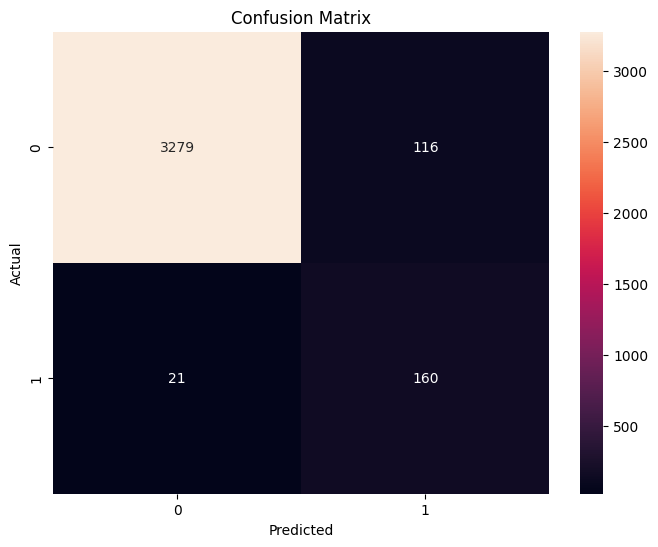

In [67]:
# plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

<p>Of all the jobs predicted to be fraudulent (class 1), only 58% were actually fraudulent. This is a bit lower, meaning a significant number of fraudulent jobs are being misclassified as legitimate (false positives).</p>

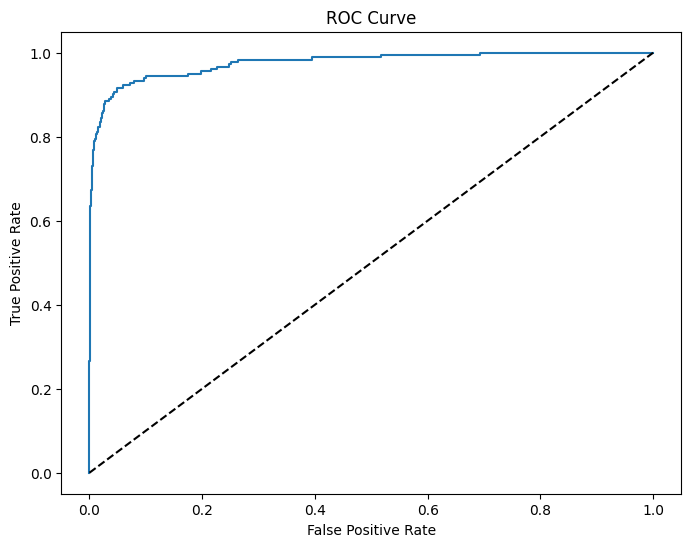

In [75]:
# plot roc-auc curve
from sklearn.metrics import roc_curve, roc_auc_score
y_pred_proba = logreg.predict_proba(X_test_tfidf)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

### Random Forest Classifier

In [76]:
# implement SMOTE to handle class imbalance
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train_tfidf, y_train)

In [77]:
# Check the new class distribution after SMOTE
smote_class_distribution = pd.Series(y_train_smote).value_counts(normalize=True)
print("New Class Distribution after SMOTE:\n", smote_class_distribution)

New Class Distribution after SMOTE:
 fraudulent
0    0.5
1    0.5
Name: proportion, dtype: float64


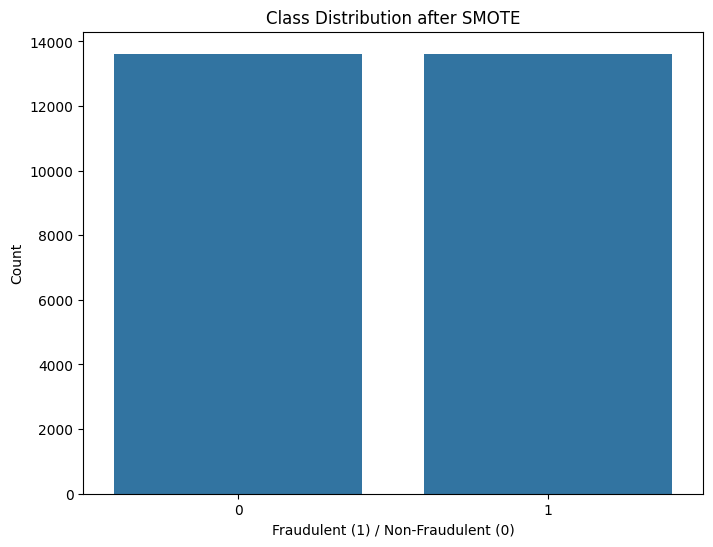

In [78]:
plt.figure(figsize=(8, 6))
sns.countplot(x=y_train_smote)
plt.xlabel('Fraudulent (1) / Non-Fraudulent (0)')
plt.ylabel('Count')
plt.title('Class Distribution after SMOTE')
plt.show()


In [79]:
# apply random forest classifier
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train_smote, y_train_smote)
y_pred_rf = rf.predict(X_test_tfidf)


In [80]:
# evaluate the model
print('Accuracy:', accuracy_score(y_test, y_pred_rf))
print('Classification Report:', classification_report(y_test, y_pred_rf))
print('Confusion Matrix:', confusion_matrix(y_test, y_pred_rf))

Accuracy: 0.9807046979865772
Classification Report:               precision    recall  f1-score   support

           0       0.98      1.00      0.99      3395
           1       0.99      0.62      0.77       181

    accuracy                           0.98      3576
   macro avg       0.99      0.81      0.88      3576
weighted avg       0.98      0.98      0.98      3576

Confusion Matrix: [[3394    1]
 [  68  113]]


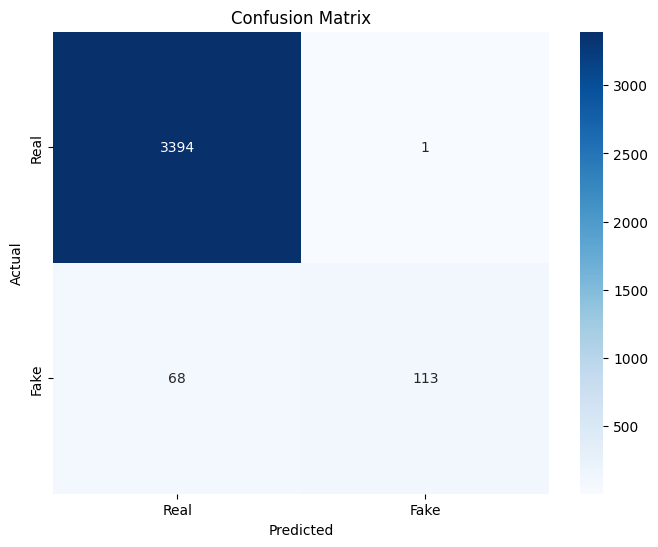

In [81]:
# Visualizing the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_test,y_pred_rf), annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Real', 'Fake'], yticklabels=['Real', 'Fake'])
plt.title('Confusion Matrix')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

<p>This is bad i suppose. The model only detects 62% of fraudulent jobs. This is the biggest issue. The model is missing 38% of fraudulent jobs, meaning it has a relatively high false-negative rate for fraud detection. </p>

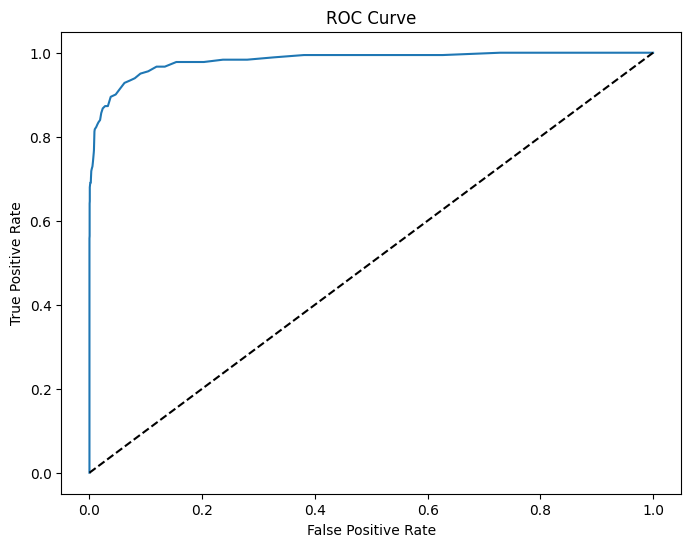

In [82]:
# plot sensitivity and specificity
from sklearn.metrics import roc_curve, roc_auc_score
y_pred_proba_rf = rf.predict_proba(X_test_tfidf)[:, 1]
fpr_rf, tpr_rf, thresholds_rf = roc_curve(y_test, y_pred_proba_rf)
plt.figure(figsize=(8, 6))
plt.plot(fpr_rf, tpr_rf)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()


### Xgboost

In [83]:
# apply hybrid sampling
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline
over = SMOTE(sampling_strategy=0.1)
under = RandomUnderSampler(sampling_strategy=0.5)
steps = [('o', over), ('u', under)]
pipeline = Pipeline(steps=steps)
X_train_hybrid, y_train_hybrid = pipeline.fit_resample(X_train_tfidf, y_train)

In [85]:
# Check the new class distribution after hybrid sampling
hybrid_class_distribution = pd.Series(y_train_hybrid).value_counts(normalize=True)
print("New Class Distribution after Hybrid Sampling:\n", hybrid_class_distribution)

New Class Distribution after Hybrid Sampling:
 fraudulent
0    0.666667
1    0.333333
Name: proportion, dtype: float64


In [84]:
# fit the xgboost classifier
from xgboost import XGBClassifier
xgb = XGBClassifier(random_state=42)
xgb.fit(X_train_hybrid, y_train_hybrid)
y_pred_xgb = xgb.predict(X_test_tfidf)

In [86]:
# evaluate the model
print('Accuracy:', accuracy_score(y_test, y_pred_xgb))
print('Classification Report:', classification_report(y_test, y_pred_xgb))
print('Confusion Matrix:', confusion_matrix(y_test, y_pred_xgb))

Accuracy: 0.9711968680089486
Classification Report:               precision    recall  f1-score   support

           0       0.99      0.98      0.98      3395
           1       0.68      0.80      0.74       181

    accuracy                           0.97      3576
   macro avg       0.84      0.89      0.86      3576
weighted avg       0.97      0.97      0.97      3576

Confusion Matrix: [[3328   67]
 [  36  145]]


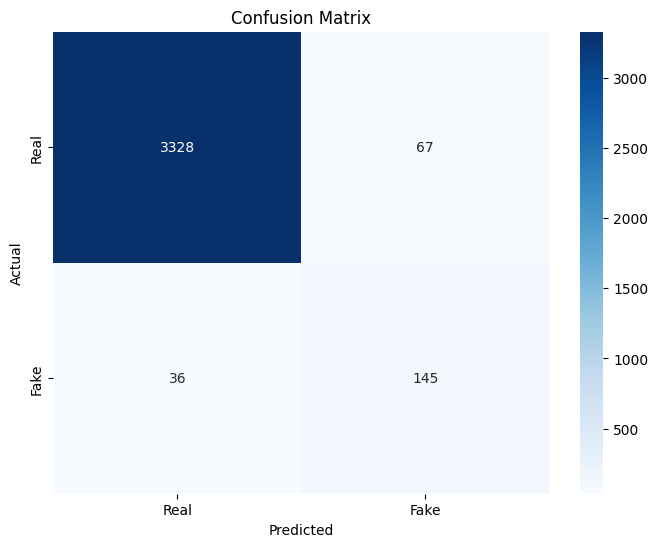

In [88]:
# plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_test, y_pred_xgb), annot=True, fmt='d', cmap='Blues',
            xticklabels=['Real', 'Fake'], yticklabels=['Real', 'Fake'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

<p>This is better than before </p>

### SVM

In [93]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MaxAbsScaler

# Define the pipeline with MaxAbsScaler and SVM
pipeline = Pipeline([
    ('scaler', MaxAbsScaler()),  # Scaler that works well with sparse data
    ('svm', SVC(random_state=42))  # Support Vector Machine
])

# Define parameter grid for tuning
param_grid = {
    'svm__C': [0.1, 1, 10, 100],  # Regularization parameter
    'svm__kernel': ['linear', 'rbf', 'poly'],  # Kernel types
    'svm__gamma': ['scale', 'auto', 0.1, 1],  # Gamma values for 'rbf' and 'poly' kernels
    'svm__degree': [3, 4, 5],  # Degree for 'poly' kernel
    'svm__class_weight': [None, 'balanced'],  # Class weights for handling class imbalance
}

# Set up GridSearchCV
grid_search = GridSearchCV(pipeline, param_grid, cv=3, n_jobs=-1, verbose=2, scoring='accuracy')

# Fit the GridSearchCV to the training data (hybrid-sampled data)
grid_search.fit(X_train_hybrid, y_train_hybrid)

# Get the best parameters and model
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

# Print out the best parameters
print("Best Parameters:", best_params)

# Predict using the best model
y_pred_svc = best_model.predict(X_test_tfidf)

# Evaluate the performance
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Print accuracy, classification report, and confusion matrix
print("Accuracy:", accuracy_score(y_test, y_pred_svc))
print("Classification Report:\n", classification_report(y_test, y_pred_svc))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_svc))


Fitting 3 folds for each of 288 candidates, totalling 864 fits
Best Parameters: {'svm__C': 1, 'svm__class_weight': 'balanced', 'svm__degree': 3, 'svm__gamma': 0.1, 'svm__kernel': 'poly'}
Accuracy: 0.9854586129753915
Classification Report:
               precision    recall  f1-score   support

           0       0.99      1.00      0.99      3395
           1       0.96      0.75      0.84       181

    accuracy                           0.99      3576
   macro avg       0.97      0.87      0.92      3576
weighted avg       0.99      0.99      0.98      3576

Confusion Matrix:
 [[3389    6]
 [  46  135]]


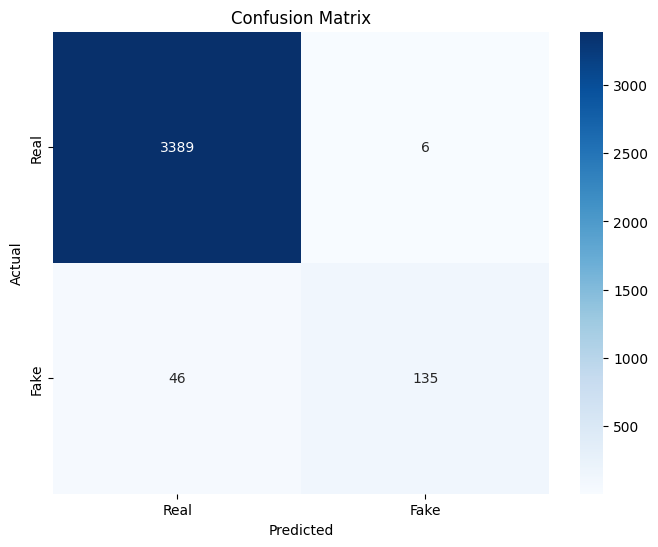

In [94]:
# plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_test, y_pred_svc), annot=True, fmt='d', cmap='Blues',
            xticklabels=['Real', 'Fake'], yticklabels=['Real', 'Fake'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

<p> This is also better but still recall is 75% only now going with deep learning nlp </p>

In [95]:
# export the best model
import joblib
joblib.dump(best_model, 'svm.pkl')
joblib.dump(rf, 'random_forest.pkl')
joblib.dump(xgb, 'xgboost.pkl')
joblib.dump(logreg, 'logistic_regression.pkl')

['logistic_regression.pkl']